In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df = pd.read_excel("C:/Users/vinee/Documents/student_data.xlsx")  
df = df[["studytime", "failures", "absences", "G1", "G2", "G3"]]  
df

,studytime,failures,absences,G1,G2,G3
0,2,0,4,12,13,14
1,3,1,2,14,15,15
2,1,0,6,10,11,12
3,2,2,10,8,9,8
4,3,0,0,15,16,17
5,1,3,14,6,7,6
6,4,0,2,18,19,19
7,2,1,4,11,12,13
8,1,2,8,9,10,9
9,3,0,1,13,14,15


In [19]:
X = df.drop("G3", axis=1)
y = df["G3"]

In [21]:
X

,studytime,failures,absences,G1,G2
0,2,0,4,12,13
1,3,1,2,14,15
2,1,0,6,10,11
3,2,2,10,8,9
4,3,0,0,15,16
5,1,3,14,6,7
6,4,0,2,18,19
7,2,1,4,11,12
8,1,2,8,9,10
9,3,0,1,13,14


In [23]:
y

0    14
1    15
2    12
3     8
4    17
5     6
6    19
7    13
8     9
9    15
Name: G3, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

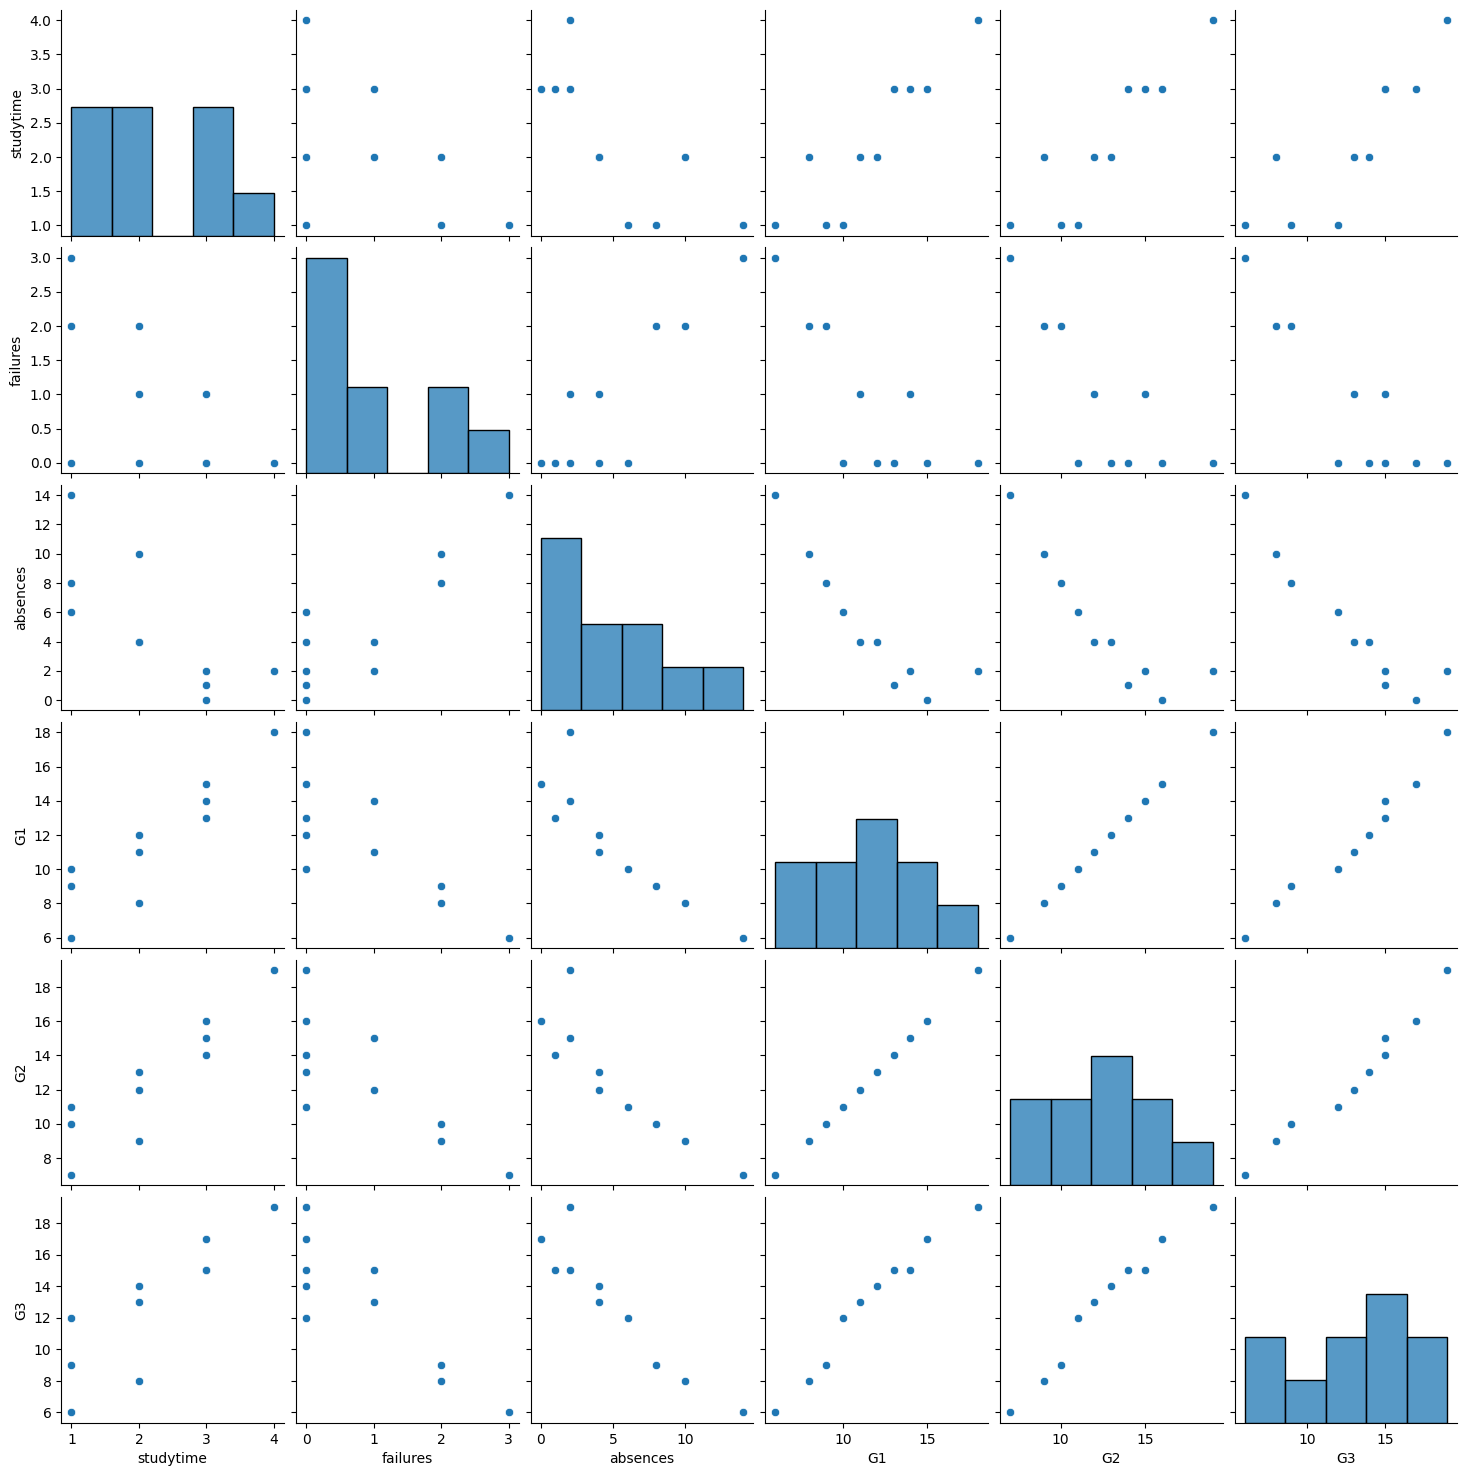

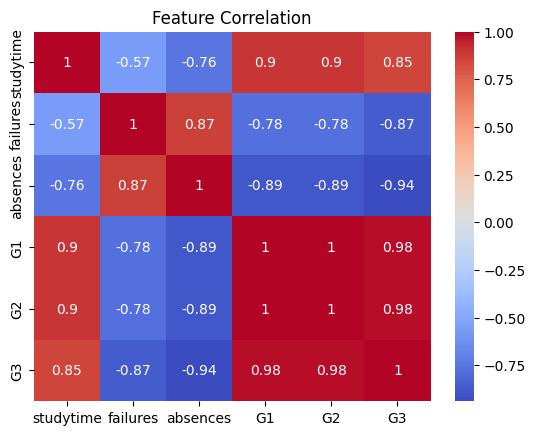

In [25]:
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.8249285800735123
MSE: 1.575642779338389


In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R²: 0.9663444444444445
MSE: 0.30289999999999984


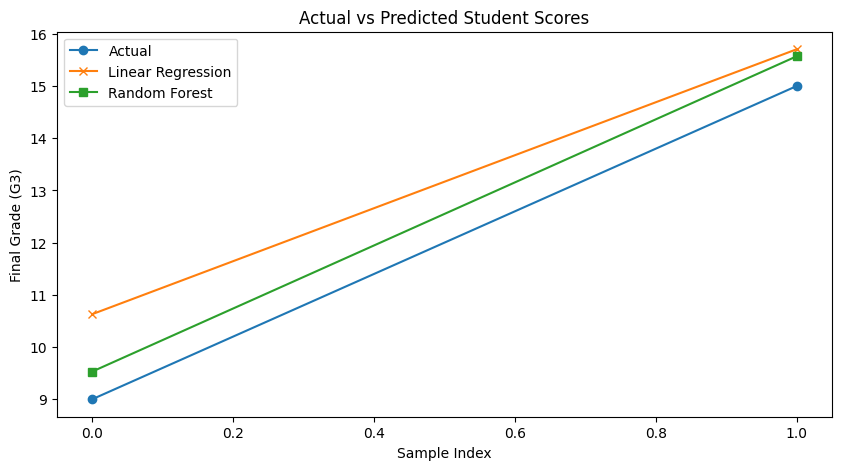

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_lr, label="Linear Regression", marker='x')
plt.plot(y_pred_rf, label="Random Forest", marker='s')
plt.legend()
plt.title("Actual vs Predicted Student Scores")
plt.xlabel("Sample Index")
plt.ylabel("Final Grade (G3)")
plt.show()
